<a href="https://www.kaggle.com/code/sonalanand/daily-practise-14-april-pd-cut-pd-crosstab?scriptVersionId=233932235" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🚢 Titanic Dataset – Exploring with `pd.cut()` and `pd.crosstab()`

In this focused notebook, I’ll be using the Titanic dataset to practise two core pandas tools:  
- `pd.cut()` → to bin numeric columns like age and fare into clean categories  
- `pd.crosstab()` → to summarise relationships between categorical variables like gender, class, and survival

Rather than using these tools in isolation, each question is framed around a small data story.  
Where helpful, I’ll include visualisations (bar plots, heatmaps, etc.) to support the interpretation — but the priority is writing clean, readable analysis using real pandas logic.

---

### 🔧 What I’m Practising:
- Categorising continuous data (like age or fare)
- Summarising categorical relationships
- Exploring survival across groups
- Creating visual evidence for my conclusions

---

### ✅ Questions Covered

#### 🔹 Using `pd.cut()`:
1. Create age bins and check survival count across each group  
2. Create custom fare bins and analyse how survival varied by fare group  
3. Bin ages and compare distribution across passenger classes  
4. Bin fare and check which class paid the most on average  
5. Create fine-grained age bins and plot survival rate per group  
6. Create fare bins and visualise survival rate as a bar plot

#### 🔹 Using `pd.crosstab()`:
7. Compare survival vs passenger class using `pd.crosstab()`  
8. Use `crosstab()` to show survival vs gender  
9. Crosstab survival vs embarkation port (`embarked`) and gender  
10. Combine class and gender in one crosstab to see interaction  
11. Crosstab age bins vs survival (use `cut` first)  
12. Create a heatmap of survival count per age bin and class combo

---



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('titanic')
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


✅ Q1: Create age bins and check survival count across each group

In [2]:


age_bins = [0, 12, 18, 30, 45, 60, 80]
age_labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Middle Aged', 'Senior']



# creating a new column for binned ages
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)



# grouping by age group and survival status, and count
age_survival = df.groupby(['age_group', 'survived'])['survived'].count().unstack().fillna(0)



# displaying the survival count table
age_survival



/tmp/ipykernel_13/1291506397.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df.groupby(['age_group', 'survived'])['survived'].count().unstack().fillna(0)


survived,0,1
age_group,,
Child,29,40
Teen,40,30
Young Adult,174,96
Adult,116,86
Middle Aged,48,33
Senior,17,5


✅ Q2: Create custom fare bins and analyse how survival varied by fare group

In [3]:

# First, defining fare bins based on general intuition (e.g. low, mid, high fare ranges)
fare_bins = [0, 10, 30, 100, 600]
fare_labels = ['Low', 'Medium', 'High', 'Very High']



# Creating a new column with fare groupings
df['fare_group'] = pd.cut(df['fare'], bins=fare_bins, labels=fare_labels)



# Grouping survival count by fare group
fare_survival = df.groupby(['fare_group', 'survived'])['survived'].count().unstack().fillna(0)



# Displaying result
fare_survival


/tmp/ipykernel_13/1368165324.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival = df.groupby(['fare_group', 'survived'])['survived'].count().unstack().fillna(0)


survived,0,1
fare_group,,
Low,255,66
Medium,182,139
High,84,97
Very High,14,39


✅ Q3: Bin ages and compare distribution across passenger classes

In [4]:

# Step 1: Defining broader age bins and create a new column

age_bins = [0, 12, 20, 40, 60, 80]
age_labels = ['Child', 'Teenager', 'Adult', 'Middle Aged', 'Senior']
df['binned_age'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)



# Step 2: Displaying the count of passengers by age group and class

age_class_table = pd.crosstab(df['binned_age'], df['pclass'])



# Step 3: Displaying the result
age_class_table



pclass,1,2,3
binned_age,,,
Child,4,17,48
Teenager,17,18,75
Adult,89,104,192
Middle Aged,62,31,35
Senior,14,3,5


✅ Q4: Bin fare and check which class paid the most on average


In [5]:
# Step 1: Defining fare bins and creating a new column

fare_bins = [0, 10, 30, 100, 600]
fare_labels = ['Low Fare', 'Medium Fare', 'High Fare', 'Very High Fare']
df['fare_group'] = pd.cut(df['fare'], bins=fare_bins, labels=fare_labels)



# Step 2: Calculating average fare group per passenger class

fare_class_avg = df.groupby('pclass')['fare_group'].value_counts(normalize=True).unstack().fillna(0)



# Step 3: Displaying the result

fare_class_avg

fare_group,Low Fare,Medium Fare,High Fare,Very High Fare
pclass,,,,
1,0.004739,0.194313,0.549763,0.251185
2,0.000000,0.865169,0.134831,0.000000
3,0.657084,0.258727,0.084189,0.000000


✅ Q5: Create fine-grained age bins and plot survival rate per group

/tmp/ipykernel_13/819039913.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age = df.groupby('fine_age_group')['survived'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


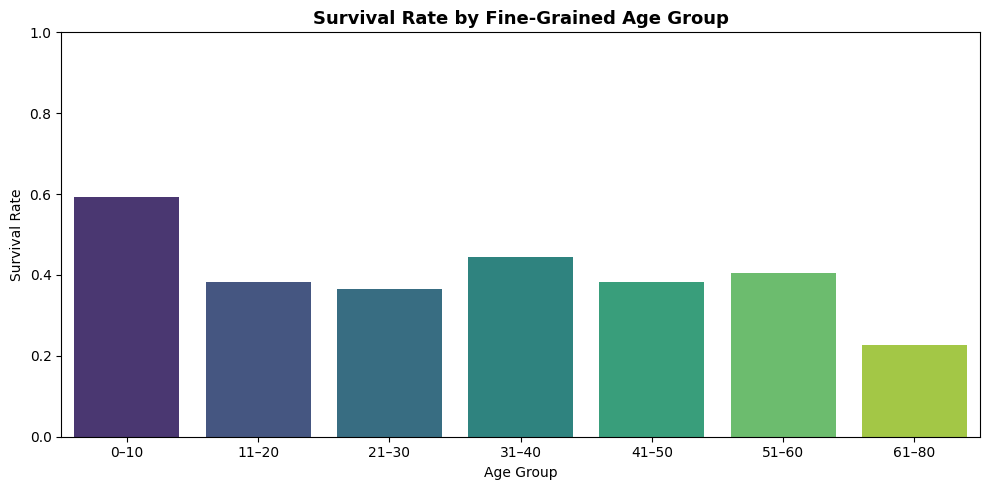

In [6]:

# Step 1: Defining smaller age intervals using pd.cut

fine_bins = [0, 10, 20, 30, 40, 50, 60, 80]
fine_labels = ['0–10', '11–20', '21–30', '31–40', '41–50', '51–60', '61–80']
df['fine_age_group'] = pd.cut(df['age'], bins=fine_bins, labels=fine_labels)



# Step 2: Calculating survival rate per age group

survival_by_age = df.groupby('fine_age_group')['survived'].mean().reset_index()



# Step 3: Plotting the survival rate

plt.figure(figsize=(10, 5))
sns.barplot(data=survival_by_age, x='fine_age_group', y='survived', palette='viridis')
plt.title("Survival Rate by Fine-Grained Age Group", fontsize=13, fontweight='bold')
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

✅ Q6: Create fare bins and visualise survival rate as a bar plot

/tmp/ipykernel_13/3876782416.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival_rate = df.groupby('fare_range')['survived'].mean().reset_index()
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


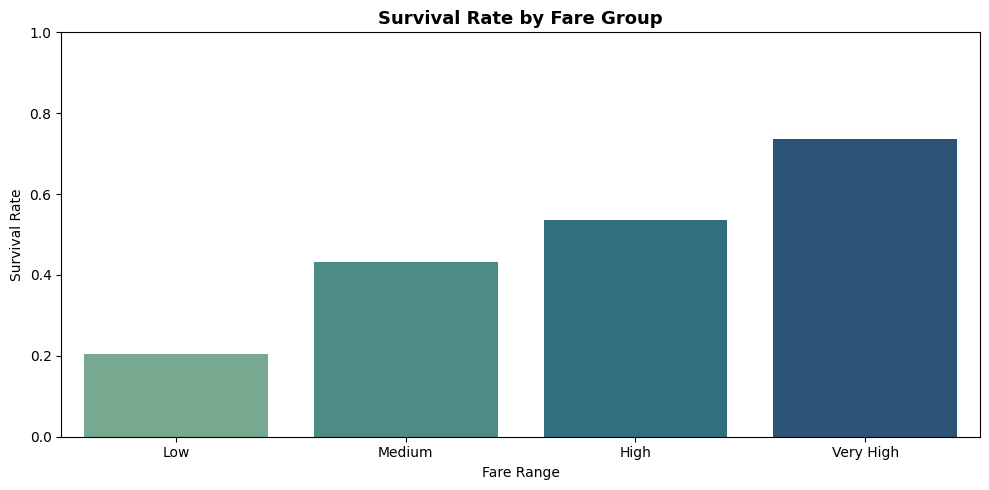

In [7]:
# Step 1: Defining custom fare bins and labels

fare_bins = [0, 10, 30, 100, 600]
fare_labels = ['Low', 'Medium', 'High', 'Very High']
df['fare_range'] = pd.cut(df['fare'], bins=fare_bins, labels=fare_labels)



# Step 2: Calculating survival rate by fare group

fare_survival_rate = df.groupby('fare_range')['survived'].mean().reset_index()



# Step 3: Plotting the survival rate for each fare range

plt.figure(figsize=(10, 5))
sns.barplot(data=fare_survival_rate, x='fare_range', y='survived', palette='crest')
plt.title("Survival Rate by Fare Group", fontsize=13, fontweight='bold')
plt.xlabel("Fare Range")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

✅ Q7: Compare survival vs passenger class using pd.crosstab()


In [8]:

# Step 1: Creating a crosstab to compare survival across pclass

survival_by_class = pd.crosstab(df['pclass'], df['survived'], margins=True)



# Step 2: Renaming columns for better readability

survival_by_class.columns = ['Did Not Survive', 'Survived', 'Total']
survival_by_class.index.name = 'Passenger Class'



# Step 3: Displaying the result

survival_by_class


,Did Not Survive,Survived,Total
Passenger Class,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


✅ Q8: Use crosstab() to show survival vs gender

In [9]:

# Step 1: Creating a crosstab between gender and survival outcome

gender_survival = pd.crosstab(df['sex'], df['survived'], margins=True)



# Step 2: Renaming columns for clarity

gender_survival.columns = ['Did Not Survive', 'Survived', 'Total']
gender_survival.index.name = 'Gender'



# Step 3: Displaying the result

gender_survival


,Did Not Survive,Survived,Total
Gender,,,
female,81,233,314
male,468,109,577
All,549,342,891


✅ Q9: Crosstab survival vs embarkation port (embarked) and gender

In [10]:


# Step 1: Creating a crosstab between embarked and gender vs survival

survival_embarked_gender = pd.crosstab([df['embarked'], df['sex']], df['survived'], margins=True)



# Step 2: Renaming columns for clarity

survival_embarked_gender.columns = ['Did Not Survive', 'Survived', 'Total']
survival_embarked_gender.index.names = ['Embarked Port', 'Gender']



# Step 3: Displaying the result

survival_embarked_gender


Did Not Survive  Survived  Total
Embarked Port Gender                                  
C             female                9        64     73
              male                 66        29     95
Q             female                9        27     36
              male                 38         3     41
S             female               63       140    203
              male                364        77    441
All                               549       340    889

✅ Q10: Crosstab of survival across passenger class and gender

In [11]:


# Step 1: Creating a crosstab between class and gender vs survival

survival_class_gender = pd.crosstab([df['class'], df['sex']], df['survived'])



# Step 2: Renaming columns for clarity

survival_class_gender.columns = ['Did Not Survive', 'Survived']
survival_class_gender.index.names = ['Class', 'Gender']



# Step 3: Displaying the result

survival_class_gender


Did Not Survive  Survived
Class  Gender                           
First  female                3        91
       male                 77        45
Second female                6        70
       male                 91        17
Third  female               72        72
       male                300        47

✅ Q11: Crosstab age bins vs survival (using cut)

In [12]:


# Step 1: Creating age bins and a new column

age_bins = [0, 12, 20, 30, 40, 60, 80]
age_labels = ['Child', 'Teen', '20s', '30s', '40–59', '60+']
df['cut_age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)



# Step 2: Creating a crosstab between age group and survival

age_survival_table = pd.crosstab(df['cut_age_group'], df['survived'], margins=True)



# Step 3: Renaming columns and displaying result

age_survival_table.columns = ['Did Not Survive', 'Survived', 'Total']
age_survival_table.index.name = 'Age Group'



age_survival_table


,Did Not Survive,Survived,Total
Age Group,,,
Child,29,40,69
Teen,68,42,110
20s,146,84,230
30s,86,69,155
40–59,78,50,128
60+,17,5,22
All,424,290,714


✅ Q12: Create a heatmap of survival count per age bin and class

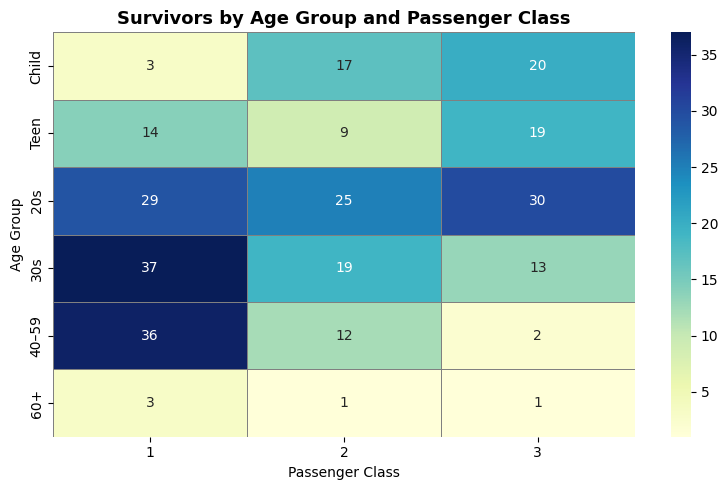

In [13]:


# Step 1: Creating age bins and a new column if not already created

age_bins = [0, 12, 20, 30, 40, 60, 80]
age_labels = ['Child', 'Teen', '20s', '30s', '40–59', '60+']
df['heat_age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)



# Step 2: Creating a crosstab of age group vs class with survival counts

heat_data = pd.crosstab(df['heat_age_group'], df['pclass'], df['survived'], aggfunc='sum').fillna(0)



# Step 3: Plotting the heatmap

plt.figure(figsize=(8, 5))


sns.heatmap(heat_data, annot=True, cmap='YlGnBu', fmt='.0f', linewidths=0.5, linecolor='gray')


plt.title("Survivors by Age Group and Passenger Class", fontsize=13, fontweight='bold')
plt.xlabel("Passenger Class")
plt.ylabel("Age Group")


plt.tight_layout()
plt.show()
